<a href="https://colab.research.google.com/github/inuwamobarak/stable-diffusion/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install --quiet --upgrade diffusers transformers scipy ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.1 MB/s eta 0:00:00


In [3]:
%pip install --quiet --upgrade accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 6.9 MB/s eta 0:00:00


In [4]:
import torch # for backend
import requests # for internet access
from PIL import Image # regular python library for image processing

from diffusers import StableDiffusionDepth2ImgPipeline # Hugging face pipeline

In [5]:
#  Creating variable instance of pipeline
pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
)
pipe.to("cuda") #  Assigning to GPU

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

StableDiffusionDepth2ImgPipeline {
  "_class_name": "StableDiffusionDepth2ImgPipeline",
  "_diffusers_version": "0.16.1",
  "depth_estimator": [
    "transformers",
    "DPTForDepthEstimation"
  ],
  "feature_extractor": [
    "transformers",
    "DPTImageProcessor"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [9]:
import urllib.parse as parse
import os
import requests

# a function to determine whether a string is a URL or not
def is_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

In [10]:
# a function to load an image
def load_image(image_path):
    if is_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#img = load_image(url)
#img

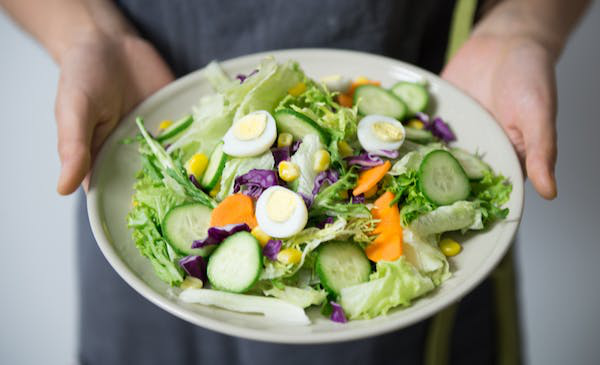

In [11]:
img = load_image("https://images.pexels.com/photos/406152/pexels-photo-406152.jpeg?auto=compress&cs=tinysrgb&w=600")
img

  0%|          | 0/35 [00:00<?, ?it/s]

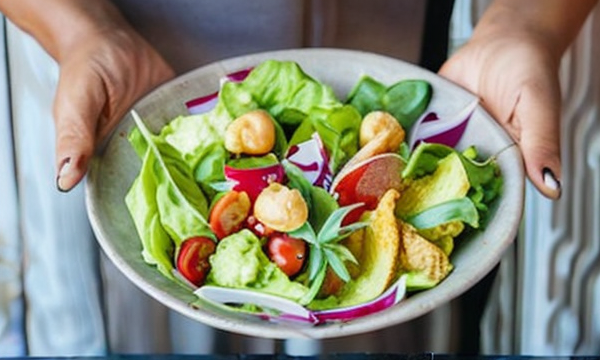

In [12]:
prompt = "A salad with tomatoes and guanas chips mixed with ketchup and mustard and bay leaf and guacamole and onions and ketchup and luscious patty with sesame seeds and cashews and onions and ketchup, ethereal,"
pipe(prompt=prompt, image=img, negative_prompt=None, strength=0.7).images[0]

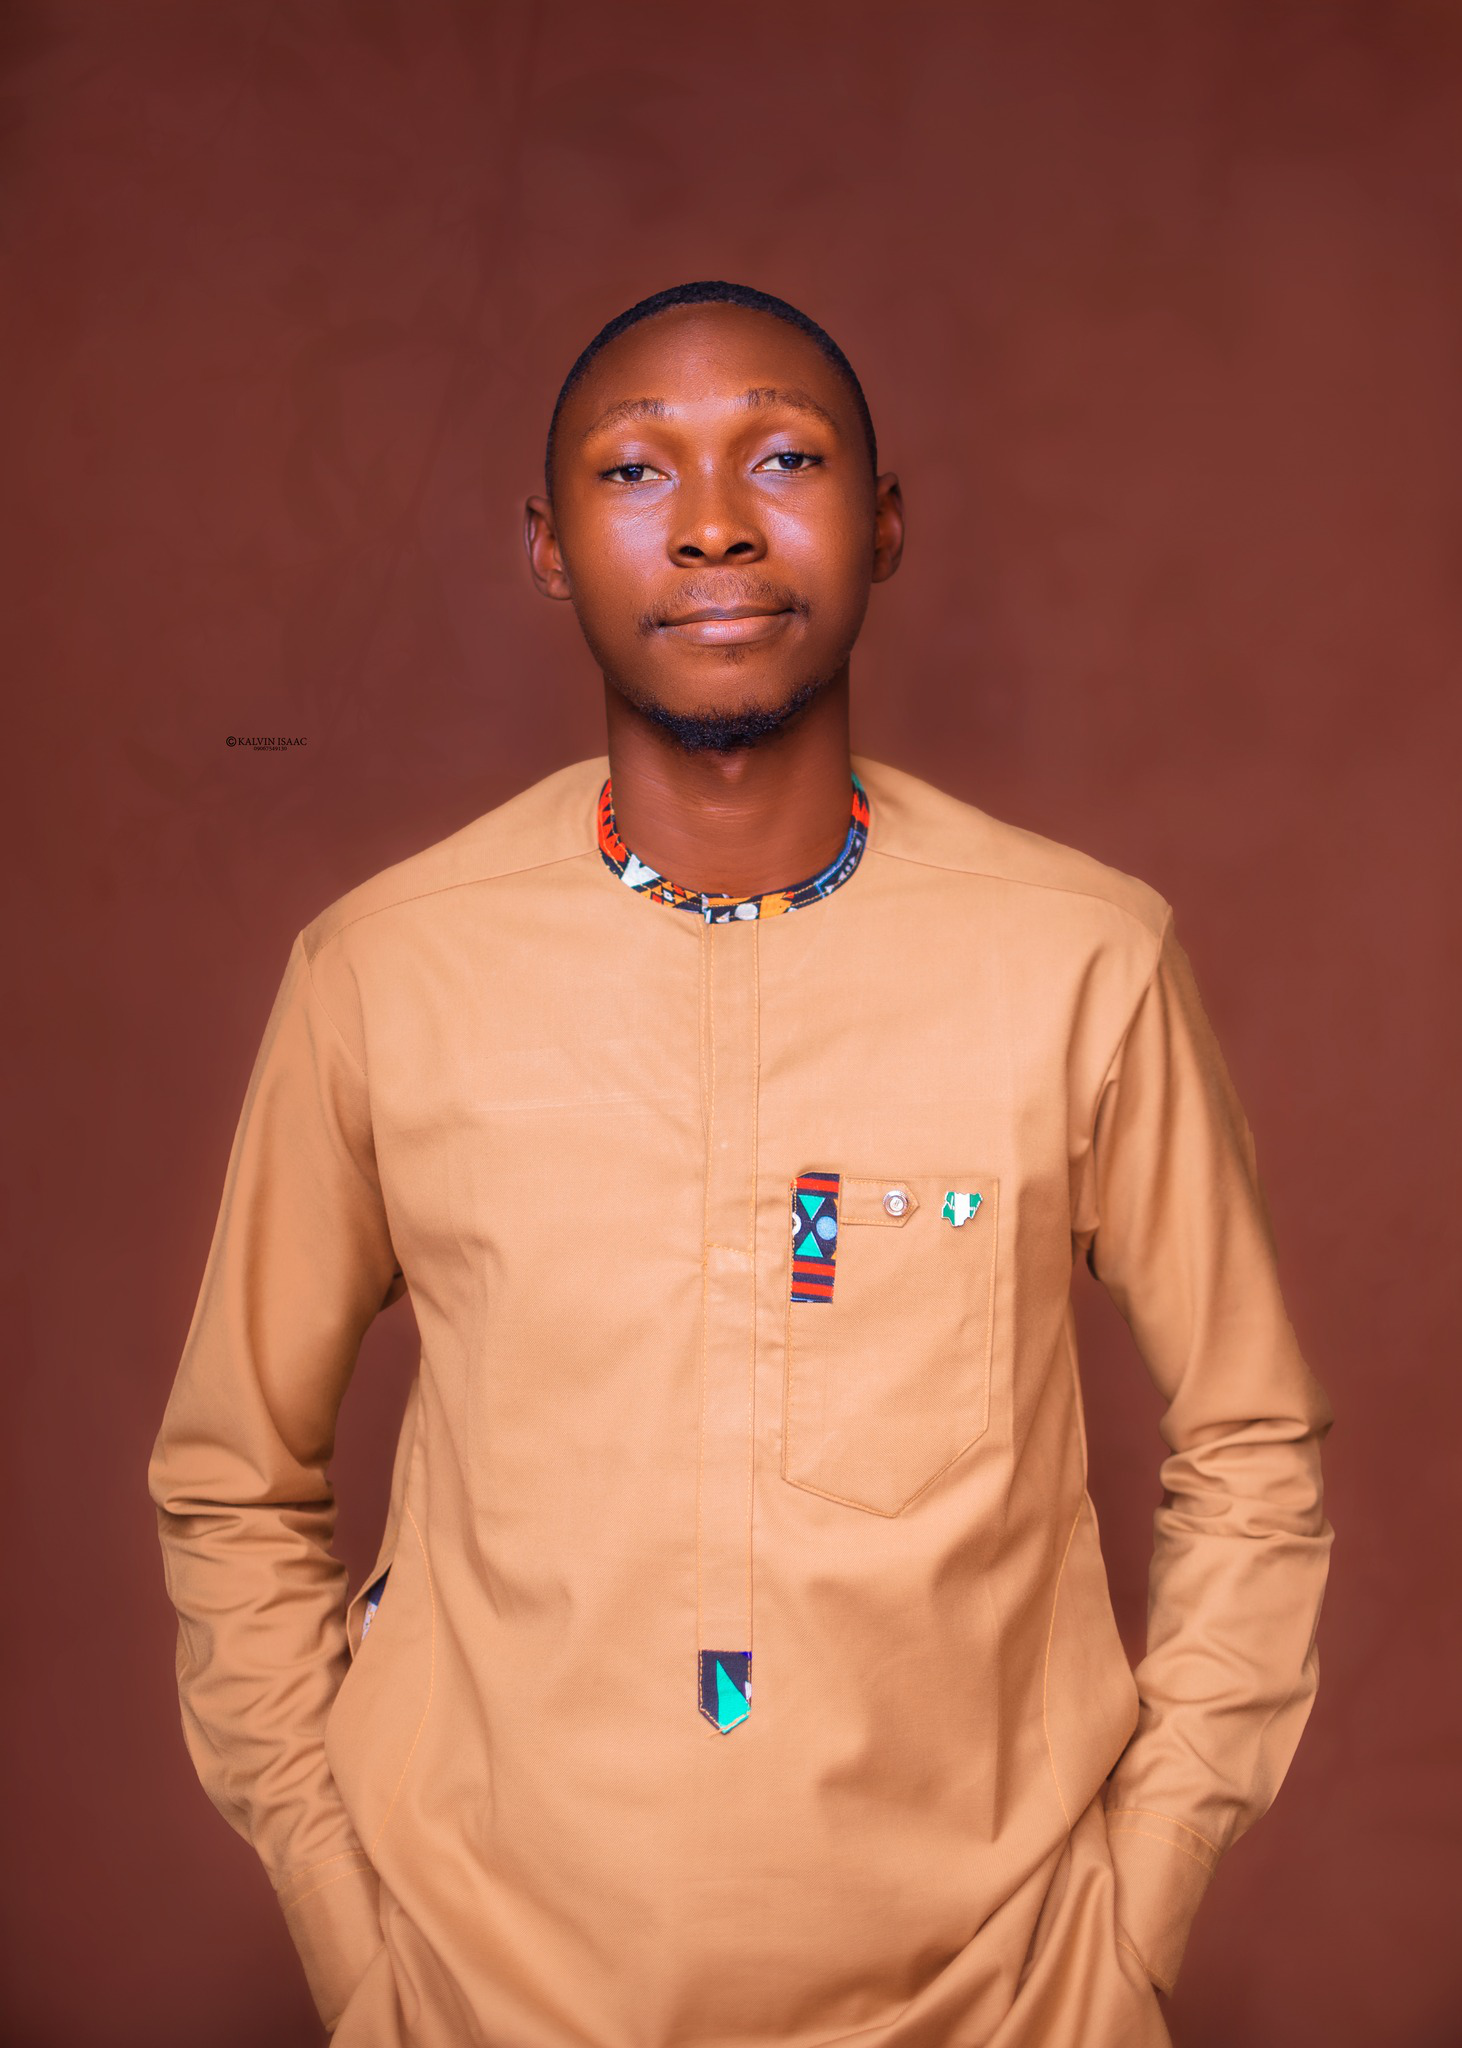

In [13]:
img = load_image("https://scontent-los2-1.xx.fbcdn.net/v/t39.30808-6/274597719_3115468025363470_7372636427150465509_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=09cbfe&_nc_eui2=AeHDA5ZFL-OMK998YnnVjRo7aB6xqCgkeuhoHrGoKCR66N-UquLDRClzeX787-_JQq5xM-g8Zu10I0d0c-OAc--9&_nc_ohc=3qF4BmtIpiYAX-uN71g&_nc_ht=scontent-los2-1.xx&oh=00_AfBlzo4JUyLjlTscoIGRu6I-OEyqitoNtPgWiaJRtueCSA&oe=645ECDD2")
img

  0%|          | 0/35 [00:00<?, ?it/s]

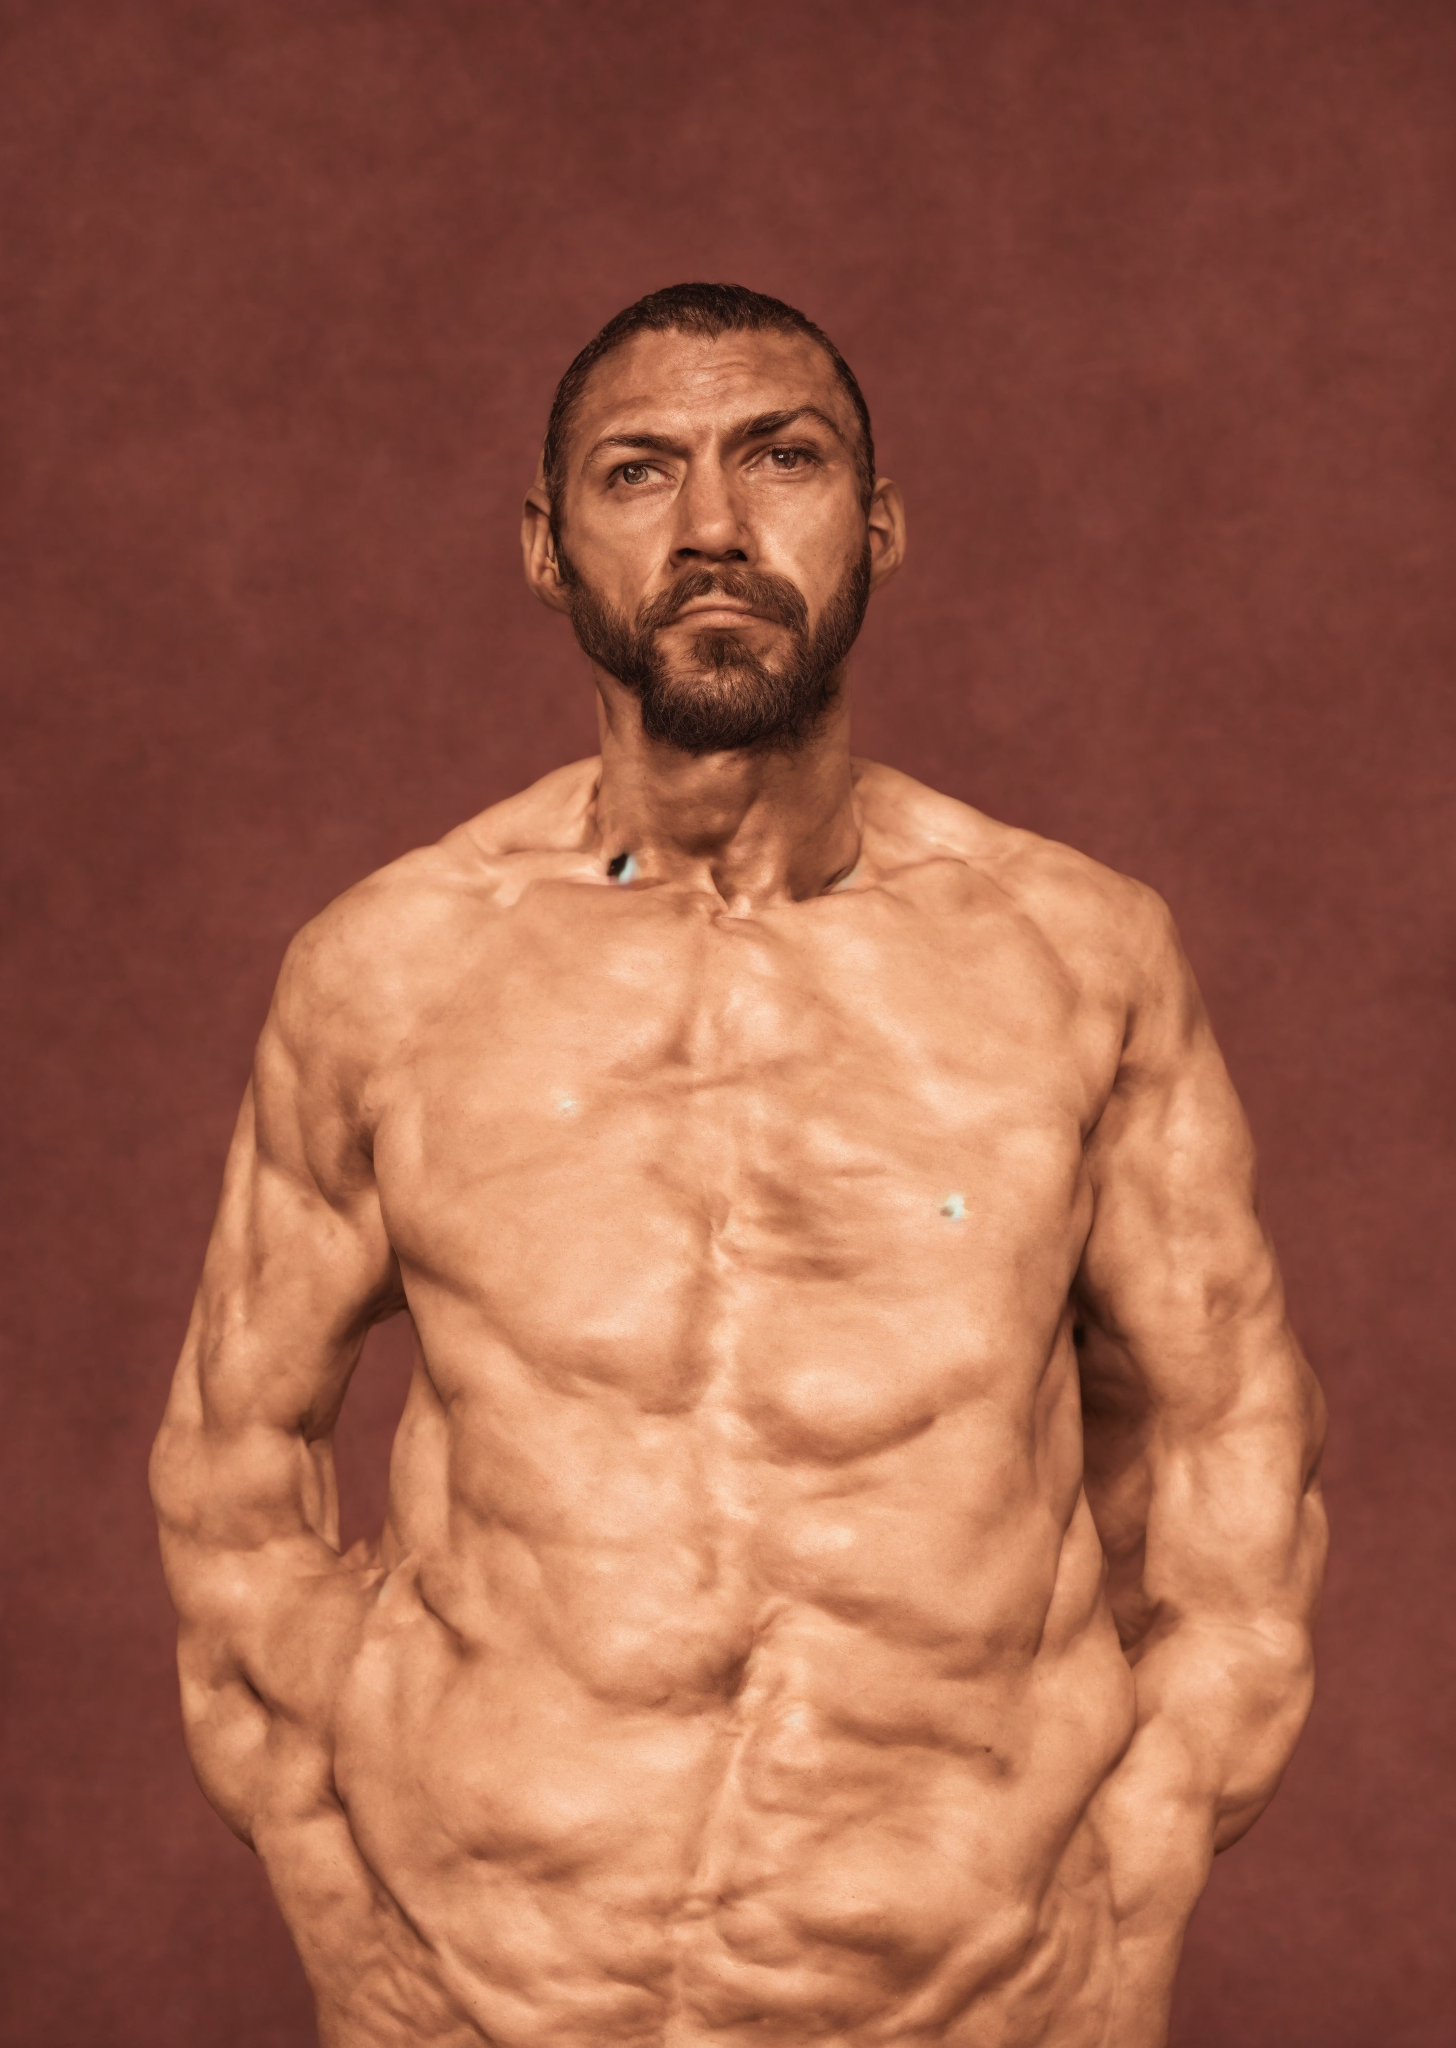

In [17]:
prompt = "A strong man healthy"
pipe(prompt=prompt, image=img, negative_prompt=None, strength=0.7).images[0]